In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np
import geopandas as gpd
import pyproj
from shapely.ops import transform
from Funciones.GEO_LIB import Plot, Poligono, Distancia, Geodecodificacion
import warnings
warnings.filterwarnings("ignore")

# Parques Nacionales

### 1. Cantidad de visitas de todos los parques Nacionales

**A continuación, se llevará a cabo un análisis de la cantidad de visitas de los parques nacionales ubicados en la Región de Los Lagos.**

In [2]:
file=r"Base de datos/Parques Nacionales/Alerce Andino.xls"
Alerce_Andino = pd.read_html(file,header=1)
Alerce_Andino = pd.DataFrame(Alerce_Andino[1])[['AÑO', 'MES', 'TOTALES']]


file=r"Base de datos/Parques Nacionales/Chiloe.xls"
Chiloe = pd.read_html(file,header=1)
Chiloe= pd.DataFrame(Chiloe[1])[['AÑO', 'MES', 'TOTALES']]

file=r"Base de datos/Parques Nacionales/Corcovado.xls"
Corcovado = pd.read_html(file,header=1)
Corcovado= pd.DataFrame(Corcovado[1])[['AÑO', 'MES', 'TOTALES']]

file=r"Base de datos/Parques Nacionales/Futaleufu.xls"
Futaleufu = pd.read_html(file,header=1)
Futaleufu= pd.DataFrame(Futaleufu[1])[['AÑO', 'MES', 'TOTALES']]

file=r"Base de datos/Parques Nacionales/Hornopiren.xls"
Hornopiren = pd.read_html(file,header=1)
Hornopiren = pd.DataFrame(Hornopiren[1])[['AÑO', 'MES', 'TOTALES']]

file=r"Base de datos/Parques Nacionales/Islotes de Pinihuil.xls"
Islotes_Pinihuil = pd.read_html(file,header=1)
Islotes_Pinihuil= pd.DataFrame(Islotes_Pinihuil[1])[['AÑO', 'MES', 'TOTALES']]

file=r"Base de datos/Parques Nacionales/Lago Palena.xls"
Lago_Palena = pd.read_html(file,header=1)
Lago_Palena= pd.DataFrame(Lago_Palena[1])[['AÑO', 'MES', 'TOTALES']]

file=r"Base de datos/Parques Nacionales/Lahuen Nadi.xls"
Lahuen_Nadi = pd.read_html(file,header=1)
Lahuen_Nadi= pd.DataFrame(Lahuen_Nadi[1])[['AÑO', 'MES', 'TOTALES']]

file=r"Base de datos/Parques Nacionales/LLanquihue.xls"
LLanquihue = pd.read_html(file,header=1)
LLanquihue= pd.DataFrame(LLanquihue[1])[['AÑO', 'MES', 'TOTALES']]

file=r"Base de datos/Parques Nacionales/Pumalin Douglas Tompkins.xls"
Pumalin_Douglas_Tompkins = pd.read_html(file,header=1)
Pumalin_Douglas_Tompkins= pd.DataFrame(Pumalin_Douglas_Tompkins[1])

file=r"Base de datos/Parques Nacionales/Puyehue.xls"
Puyehue = pd.read_html(file,header=1)
Puyehue= pd.DataFrame(Puyehue[1])[['AÑO', 'MES', 'TOTALES']]

file=r"Base de datos/Parques Nacionales/Rio Cruces.xls"
Rio_Cruces = pd.read_html(file,header=1)
Rio_Cruces= pd.DataFrame(Rio_Cruces[1])[['AÑO', 'MES', 'TOTALES']]
file=r"Base de datos/Parques Nacionales/Vicente Perez Rosales.xls"
Vicente_Perez_Rosales = pd.read_html(file,header=1)
Vicente_Perez_Rosales= pd.DataFrame(Vicente_Perez_Rosales[1])[['AÑO', 'MES', 'TOTALES']]

parques = pd.DataFrame({'Alerce Andino':Alerce_Andino['TOTALES'],'Chiloé':Chiloe['TOTALES'],'Corcovado':Corcovado['TOTALES'],
                         'Futaleufú':Futaleufu['TOTALES'],'Hornopirén':Hornopiren['TOTALES'],
                         'Islotes Piñihuil':Islotes_Pinihuil['TOTALES'] ,'Lago Palena':Lago_Palena['TOTALES'],
                         'Lahuen Ñadi':Lahuen_Nadi['TOTALES'],'Llanquihue':LLanquihue['TOTALES'],
                         'Pumalin Douglas Tompkins':Pumalin_Douglas_Tompkins['TOTALES'],'Puyehue':Puyehue['TOTALES'],
                         'Río Cruces':Rio_Cruces['TOTALES'], 'Vicente Perez Rosales':Vicente_Perez_Rosales['TOTALES'],
                         'Año':Alerce_Andino['AÑO'],'Mes':Alerce_Andino['MES']})

# Crear la columna "año-mes" concatenando Año y Mes
parques = parques.fillna(0)
parques['Año-Mes'] = parques['Año'].astype(int).astype(str) + '-' + parques['Mes']
# Mapeo de nombres de mes en español a inglés
meses_a_ingles = {
    'ENERO': 'January',
    'FEBRERO': 'February',
    'MARZO': 'March',
    'ABRIL': 'April',
    'MAYO': 'May',
    'JUNIO': 'June',
    'JULIO': 'July',
    'AGOSTO': 'August',
    'SEPTIEMBRE': 'September',
    'OCTUBRE': 'October',
    'NOVIEMBRE': 'November',
    'DICIEMBRE': 'December'
}

# Reemplazar los nombres de mes en español por inglés
parques['Año-Mes'] = parques['Año'].astype(int).astype(str) + '-' + parques['Mes'].replace(meses_a_ingles)

# Convertir 'Año-Mes' a objeto datetime
parques['Año-Mes'] = pd.to_datetime(parques['Año-Mes'], format='%Y-%B')
# Filtrar las fechas mayores o iguales a '2012-06'
parques = parques[parques['Año-Mes'] >= '2012-06']

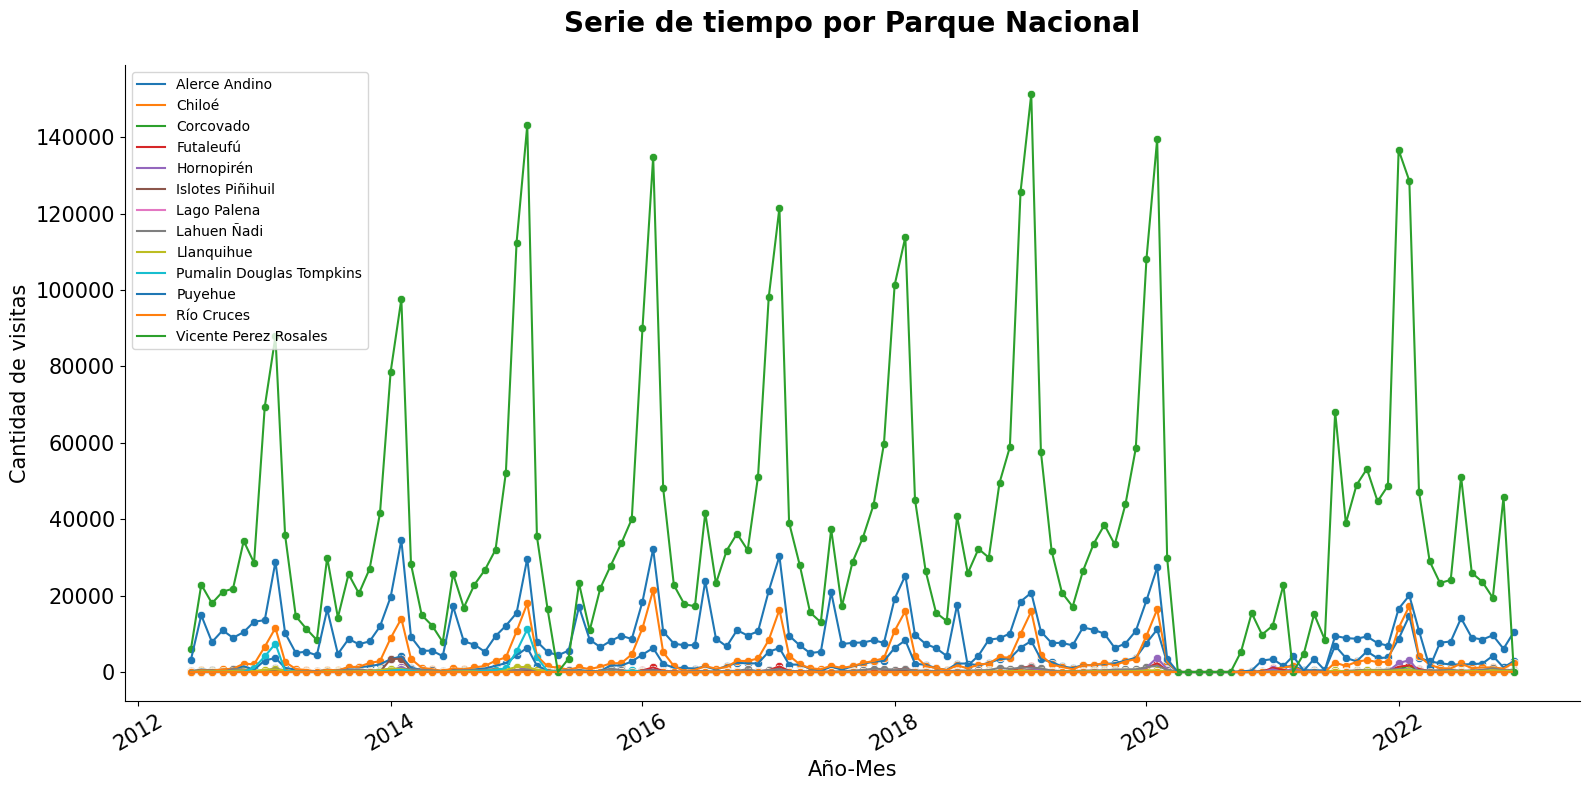

In [3]:
# Graficar todas las columnas
def hide_border(ax):
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


# Crear un gráfico de puntos y líneas para cada casino
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for columna in parques.columns:
    if columna not in ['Año', 'Mes','Año-Mes']:
        sns.lineplot(x='Año-Mes',y=columna,data=parques, label=columna)
        sns.scatterplot(x='Año-Mes',y=columna,data=parques,)

ax.set_xlabel("Año-Mes", fontsize=15)
ax.set_ylabel("Cantidad de visitas", fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=30, fontsize=15)
plt.yticks(fontsize=15)
ax.set_title("Serie de tiempo por Parque Nacional", pad=24, fontweight=700, fontsize=20)
hide_border(ax)
ax.legend()  # Show the legend with category labels
fig.tight_layout()

### 2. Cantidad de reviews de todos los parques Nacionales

**Los PlaceId de los lugares en la BBDD de reviews son los siguientes:**

    1. Alerce Andino: ChIJYU2bq_q5GZYRYEi8YLkTNWw
    2. Chiloé: ChIJW-7Ofr83IpYRFqQt3Ce_o7Y
    3. Corcovado: ChIJT_Bp618zHpYRtDCQZ8M42K8
    4. Futaleufu: ChIJteVBHmrnHZYR8gUZZmKwyVw
    5. Hornopirén: ChIJiWJrz6pzGZYRHEQNHCzn0_M
    6. Islotes Piñih: ChIJVVVVQpr6IpYRO1lDIpV97pA
    7. Lago Palena: ChIJH4JP_-Tb9b0RzrxQFWoFaew
    8  Lahuen Ñadi: ChIJbaEJNwQjGJYR4SJU0QmzTRk
    9. LLanquihue: ChIJ-6OSwPrPGZYRXqrI00ai7uEu   
    10. Pumalin Douglas Tompk: ChIJ5d96yCjRHpYR9LhclEn7KsQn  
    11. Puyehue: ChIJDXwMbuEvF5YReiAA8fpQrtY
    12. Río Cruz: No tiene  
    13. Vicente Perez Rosa: ChIJZzxnijxaF5YRyPFcPuGJKWAes'


In [4]:
# Lectura de archivo que contiene los comentarios de los lugaresChIJYU2bq_q5GZYRYEi8YLkTNWw
datos_original = pd.read_excel('Base de datos/Base de datos Chiloe Full.xlsx').reset_index()
datos = datos_original.copy()
datos = datos.rename({'index':'Id'}, axis='columns')

# Convertir 'publishedAtDate' a tipo datetime
datos['publishedAtDate'] = pd.to_datetime(datos['publishedAtDate'])

# Crear columna de año-mes
datos['AñoMes'] = datos['publishedAtDate'].dt.to_period('M')


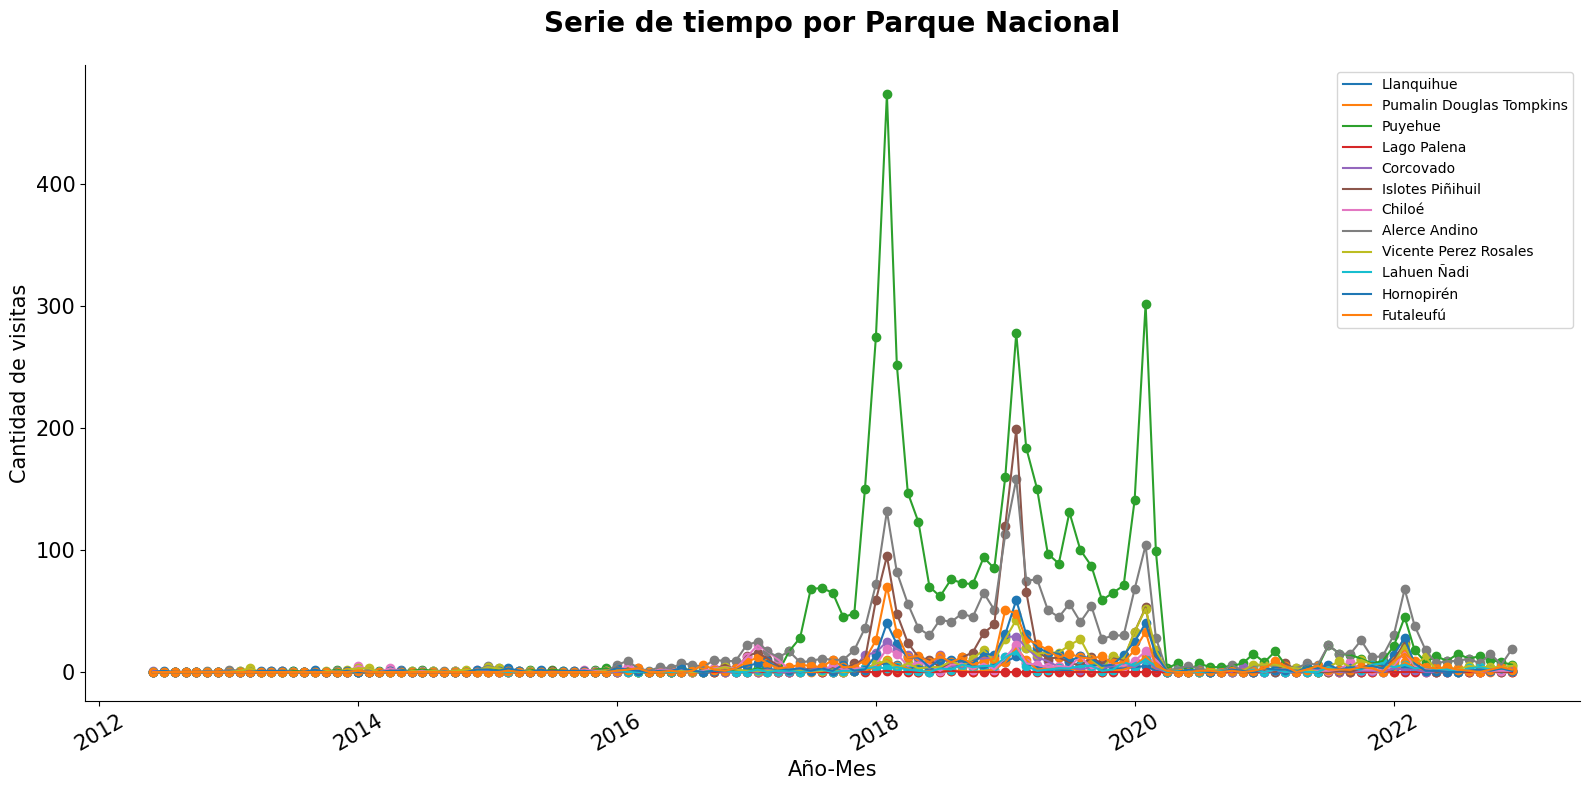

In [5]:

# Filtrar el DataFrame para incluir solo los 'placeId' especificados
place_ids = ['ChIJYU2bq_q5GZYRYEi8YLkTNWw', 'ChIJW-7Ofr83IpYRFqQt3Ce_o7Y', 'ChIJT_Bp618zHpYRtDCQZ8M42K8','ChIJteVBHmrnHZYR8gUZZmKwyVw','ChIJiWJrz6pzGZYRHEQNHCzn0_M',
            'ChIJVVVVQpr6IpYRO1lDIpV97pA','ChIJH4JP_-Tb9b0RzrxQFWoFaew','ChIJbaEJNwQjGJYR4SJU0QmzTRk','ChIJ-6OSwPrPGZYRXqrI00ai7uE','ChIJ5d96yCjRHpYR9LhclEn7KsQ',
            'ChIJDXwMbuEvF5YReiAA8fpQrtY','ChIJZzxnijxaF5YRyPFcPuGJKWA']
columnas = ["Alerce Andino","Chiloé","Corcovado","Futaleufú","Hornopirén","Islotes Piñihuil","Lago Palena","Lahuen Ñadi","Llanquihue",
    "Pumalin Douglas Tompkins",  "Puyehue","Vicente Perez Rosales"]

filtered_data = datos[datos['placeId'].isin(place_ids)]

places_dict = {
    'Alerce Andino': 'ChIJYU2bq_q5GZYRYEi8YLkTNWw',
    'Chiloé': 'ChIJW-7Ofr83IpYRFqQt3Ce_o7Y',
    'Corcovado': 'ChIJT_Bp618zHpYRtDCQZ8M42K8',
    'Futaleufú': 'ChIJteVBHmrnHZYR8gUZZmKwyVw',
    'Hornopirén': 'ChIJiWJrz6pzGZYRHEQNHCzn0_M',
    'Islotes Piñihuil': 'ChIJVVVVQpr6IpYRO1lDIpV97pA',
    'Lago Palena': 'ChIJH4JP_-Tb9b0RzrxQFWoFaew',
    'Lahuen Ñadi': 'ChIJbaEJNwQjGJYR4SJU0QmzTRk',
    'Llanquihue': 'ChIJ-6OSwPrPGZYRXqrI00ai7uE',
    'Pumalin Douglas Tompkins': 'ChIJ5d96yCjRHpYR9LhclEn7KsQ',
    'Puyehue': 'ChIJDXwMbuEvF5YReiAA8fpQrtY', 
    'Vicente Perez Rosales': 'ChIJZzxnijxaF5YRyPFcPuGJKWA'}

filtered_data = filtered_data[['placeId','AñoMes','reviewId']]
# Utilizamos pivot_table para contar los comentarios por 'PlaceId' y 'AñoMes'
comentarios_por_placeid_y_anomes = filtered_data.pivot_table(index='AñoMes', columns='placeId', values='reviewId', aggfunc='count', fill_value=0).rename(columns={v: k for k, v in places_dict.items()}).reset_index()

# Convertir 'AñoMes' a tipo datetime
comentarios_por_placeid_y_anomes['AñoMes']= comentarios_por_placeid_y_anomes['AñoMes'].dt.to_timestamp().dt.strftime('%Y-%m')
comentarios_por_placeid_y_anomes['AñoMes'] = pd.to_datetime(comentarios_por_placeid_y_anomes['AñoMes'])

# Crear un rango de fechas desde '2012-06' hasta '2023-04' y completar el DataFrame con las fechas que faltan y rellenar con 0
fechas = pd.date_range(start='2012-06', end='2022-12', freq='MS')
fechas = pd.DataFrame({'AñoMes': fechas})
comentarios_completo = pd.merge(fechas,comentarios_por_placeid_y_anomes, on='AñoMes', how='left').fillna(0)


# Crear un gráfico de puntos y líneas para cada casino
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
for columna in comentarios_completo.columns:
    if columna not in ['AñoMes','placeId']:
        plt.plot(comentarios_completo['AñoMes'],comentarios_completo[columna], label=columna)
        plt.scatter(comentarios_completo['AñoMes'],comentarios_completo[columna])
ax.set_xlabel("Año-Mes", fontsize=15)
ax.set_ylabel("Cantidad de visitas", fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=30, fontsize=15)
plt.yticks(fontsize=15)
ax.set_title("Serie de tiempo por Parque Nacional", pad=24, fontweight=700, fontsize=20)
hide_border(ax)
ax.legend()  # Show the legend with category labels
fig.tight_layout()

## Parque Nacional Alerce Andino

Correlación de Pearson entre las columnas:
0.0883333055906061


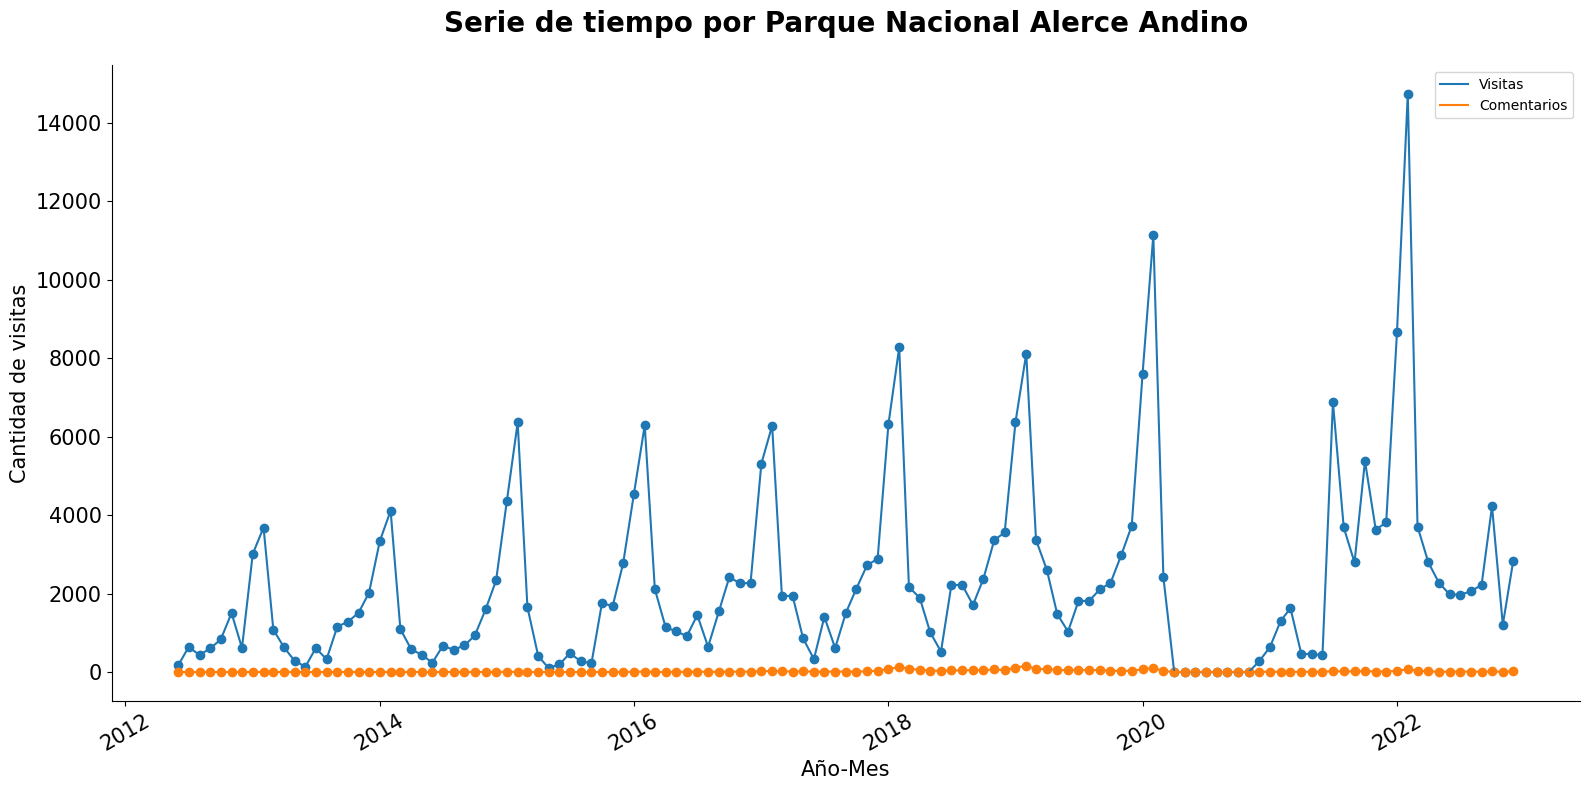

In [6]:

def graficar_pearson(columna,parques,comentarios_completo):
    serie_1 = parques[['Año-Mes',columna]]
    serie_2 = comentarios_completo[['AñoMes',columna]]
    
    
    # Crear un gráfico de puntos y líneas para cada casino
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    plt.plot(serie_1['Año-Mes'],serie_1[columna], label='Visitas')
    plt.scatter(serie_1['Año-Mes'],serie_1[columna])
    plt.plot(serie_2['AñoMes'],serie_2[columna], label='Comentarios')
    plt.scatter(serie_2['AñoMes'],serie_2[columna])
    ax.set_xlabel("Año-Mes", fontsize=15)
    ax.set_ylabel("Cantidad de visitas", fontsize=15)
    plt.setp(ax.get_xticklabels(), rotation=30, fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_title("Serie de tiempo por Parque Nacional " + columna, pad=24, fontweight=700, fontsize=20)
    hide_border(ax)
    ax.legend()  # Show the legend with category labels
    fig.tight_layout()
    
    correlacion_pearson = serie_1.corrwith(serie_2, axis=0)
    # Imprimir la correlación de Pearson
    print("Correlación de Pearson entre las columnas:")
    print(correlacion_pearson[0])
    
columna = 'Alerce Andino'
graficar_pearson(columna,parques,comentarios_completo)

In [7]:
comentarios_completo['Chiloé'].sum()

418.0

## Parque Nacional Chiloé

Correlación de Pearson entre las columnas:
-0.09908944703089852


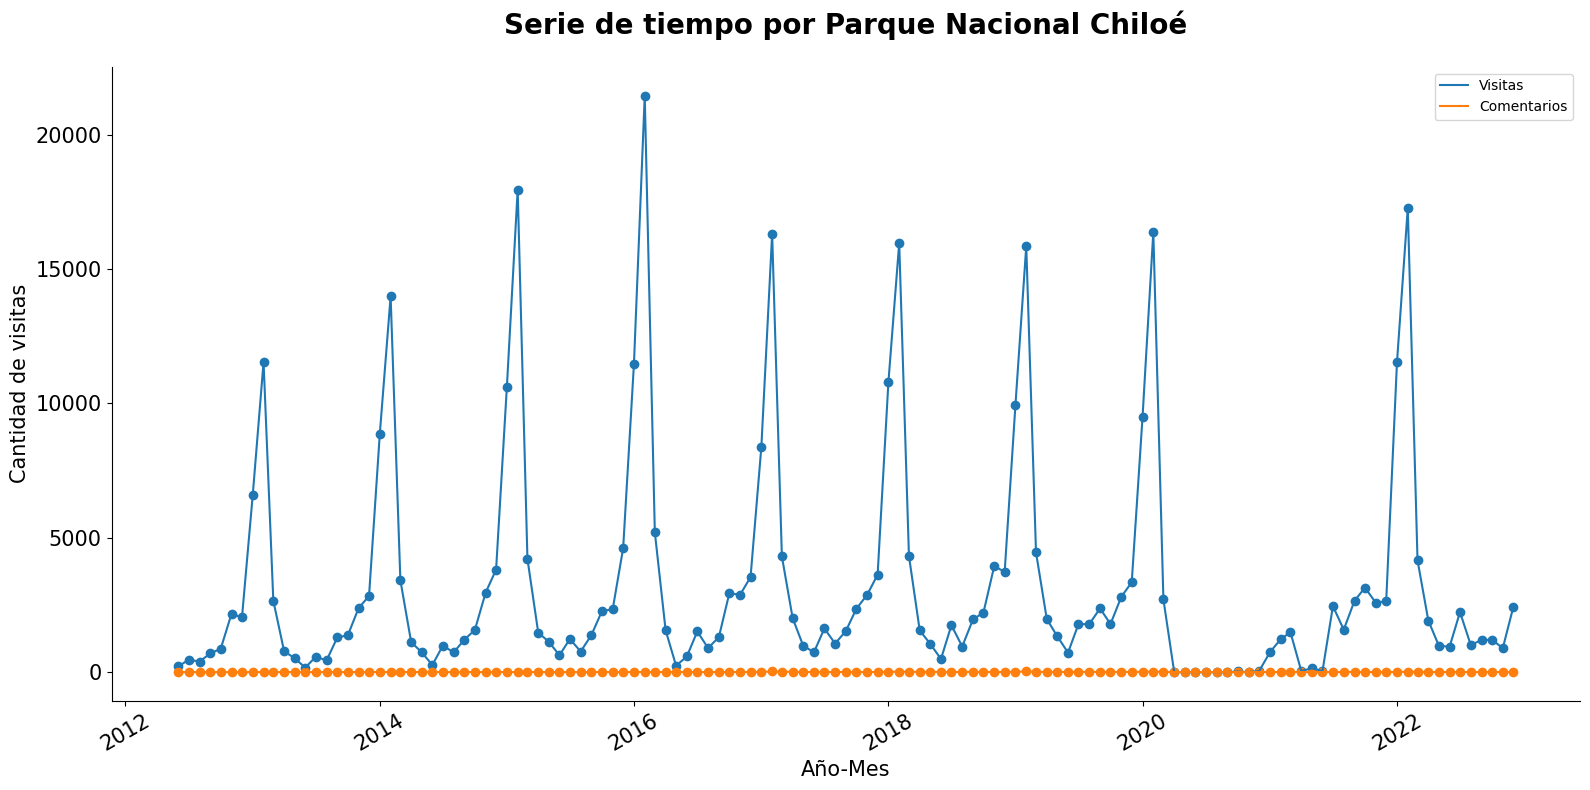

In [8]:
columna = 'Chiloé'
graficar_pearson(columna,parques,comentarios_completo)

## Parque Nacional Corcovado

Correlación de Pearson entre las columnas:
-0.04810551880562379


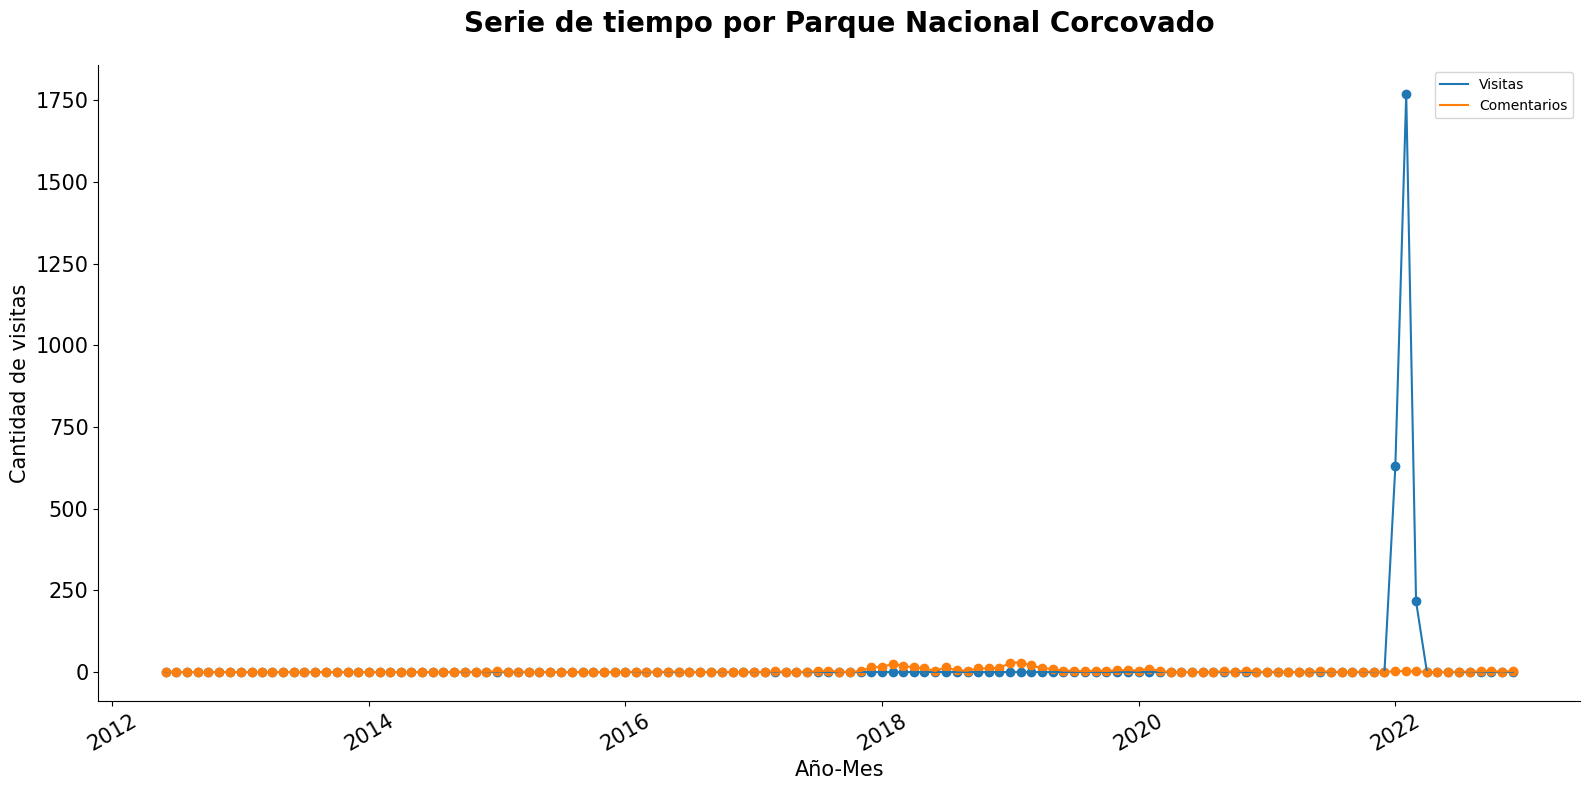

In [9]:
columna = 'Corcovado'
graficar_pearson(columna,parques,comentarios_completo)

## Parque Nacional Futaleufú

Correlación de Pearson entre las columnas:
-0.036735495151679766


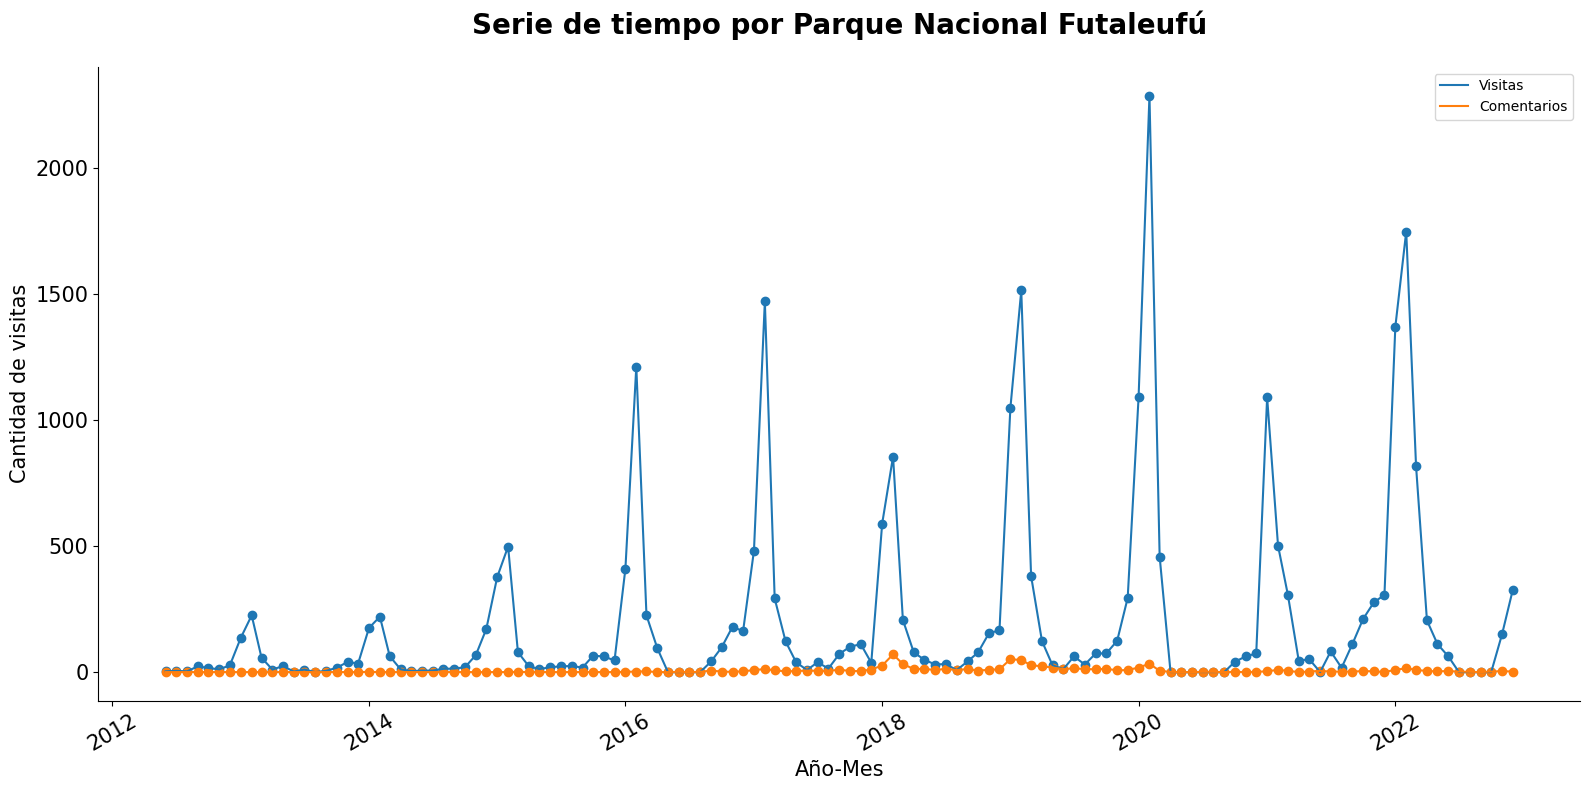

In [10]:
columna = 'Futaleufú'
graficar_pearson(columna,parques,comentarios_completo)

## Parque Nacional Hornopirén

Correlación de Pearson entre las columnas:
-0.12408216455116967


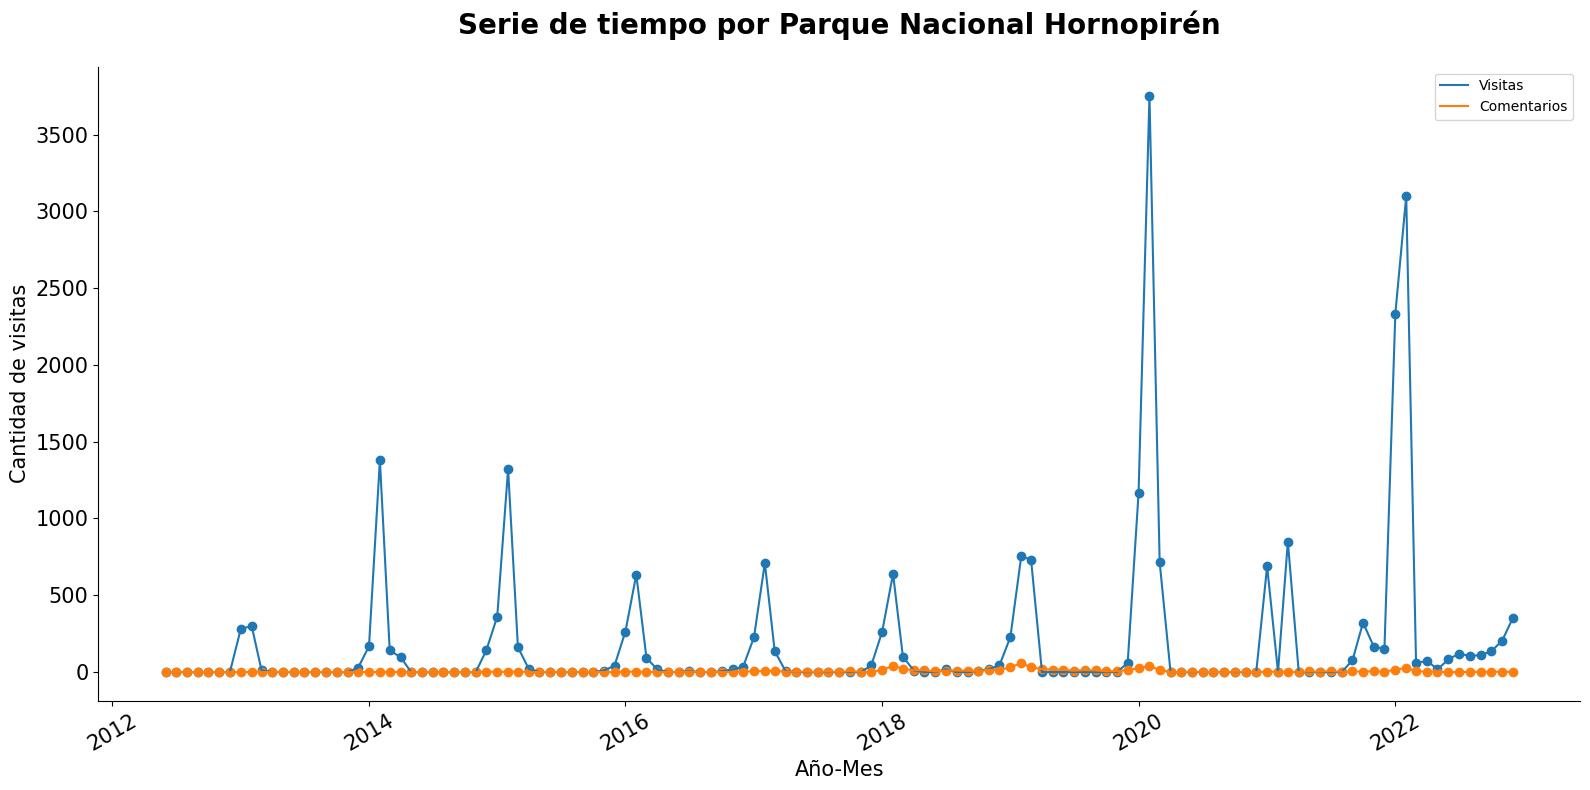

In [11]:
columna = 'Hornopirén'
graficar_pearson(columna,parques,comentarios_completo)

## Parque Nacional Islotes Piñihuil

Correlación de Pearson entre las columnas:
-0.09504218179917198


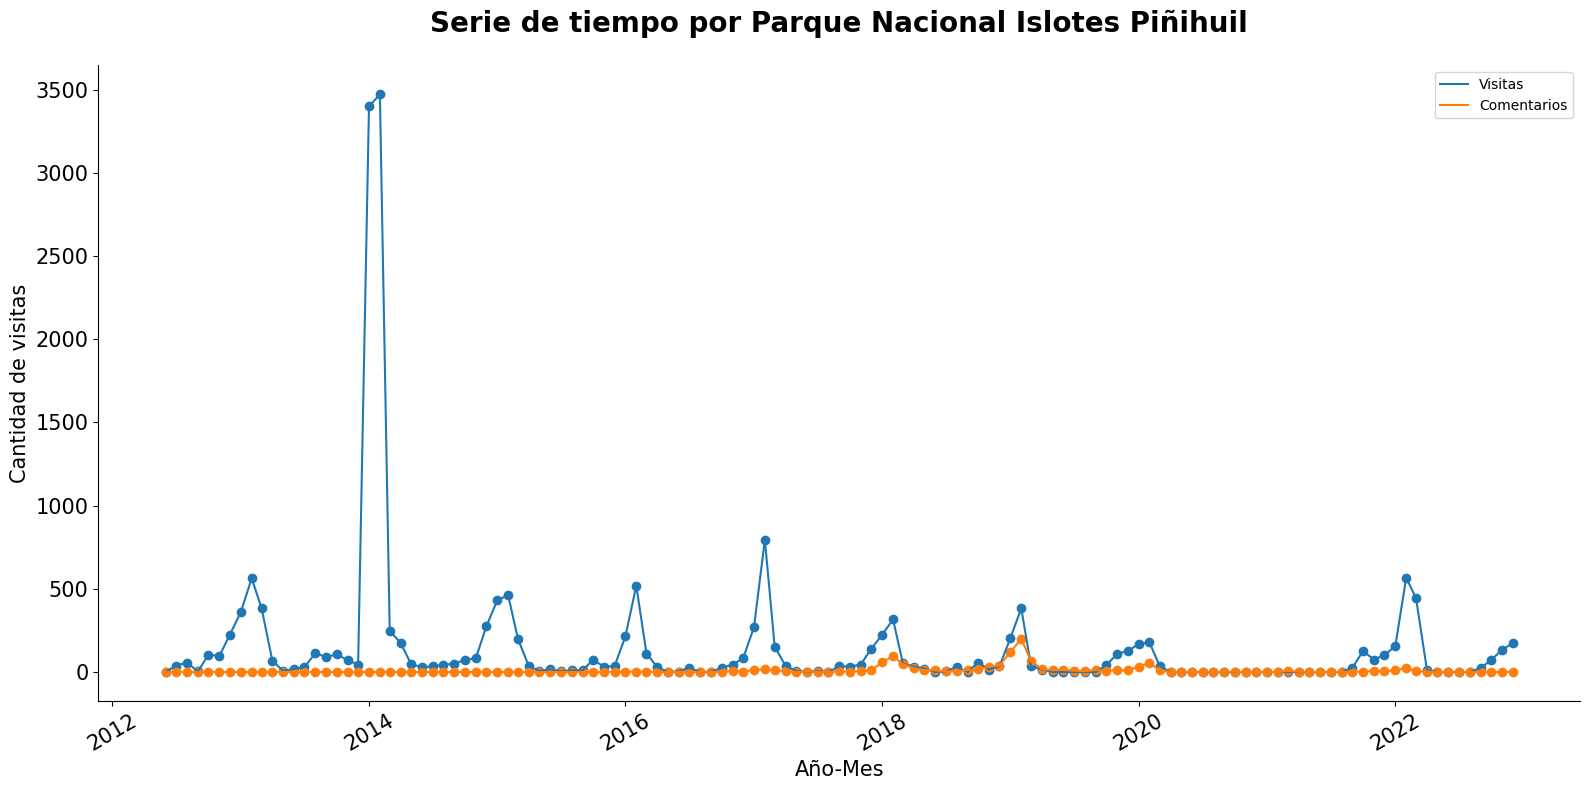

In [12]:
columna = 'Islotes Piñihuil'
graficar_pearson(columna,parques,comentarios_completo)

## Parque Nacional Lahuen Ñadi

Correlación de Pearson entre las columnas:
-0.031475789507417626


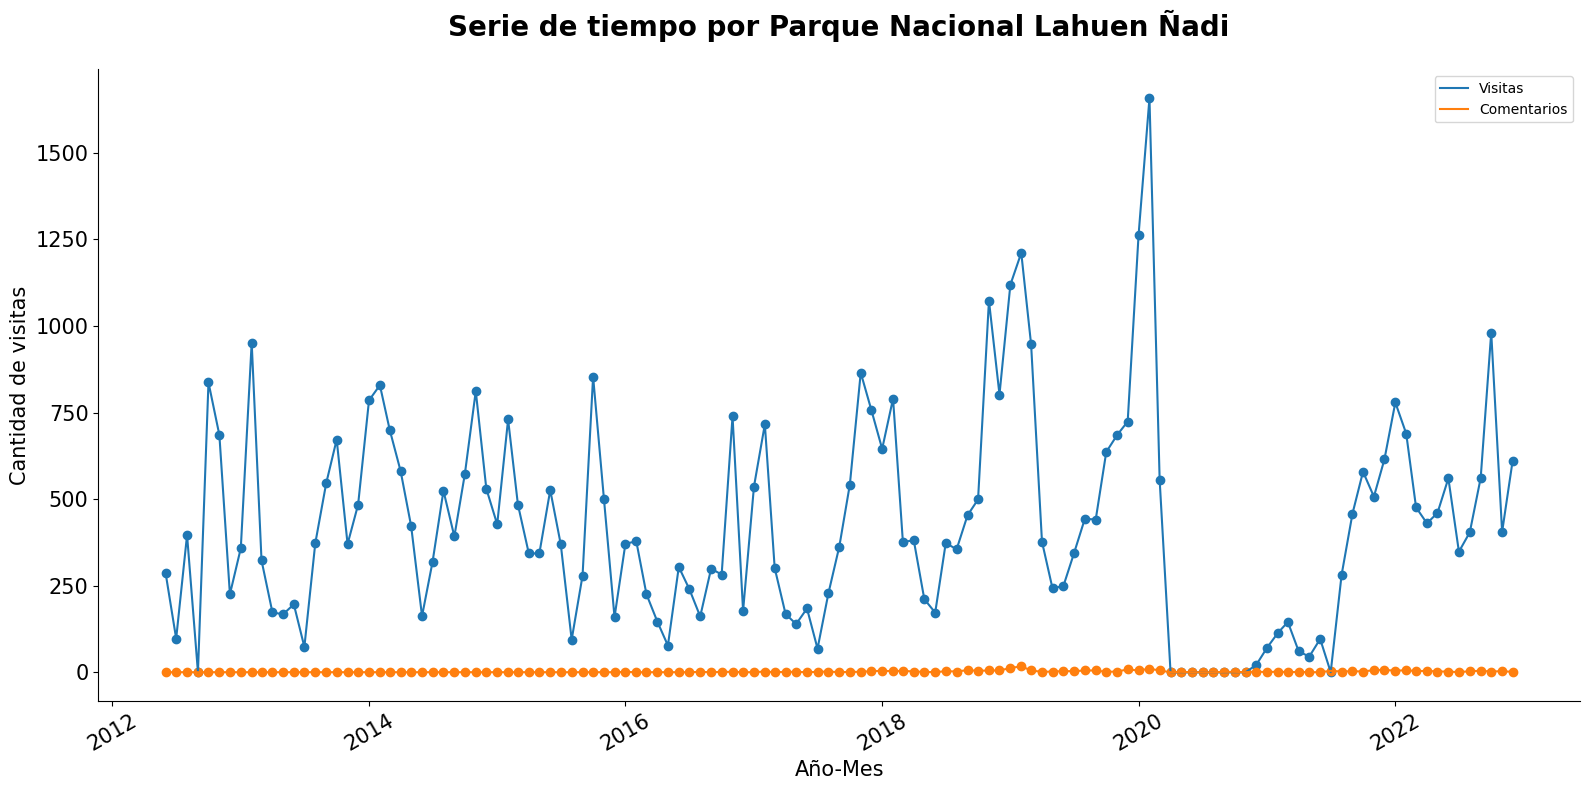

In [13]:
columna = 'Lahuen Ñadi'
graficar_pearson(columna,parques,comentarios_completo)

## Parque Nacional LLanquihue

In [14]:
comentarios_completo['Llanquihue'].sum()

184.0

Correlación de Pearson entre las columnas:
-0.15543672467479408


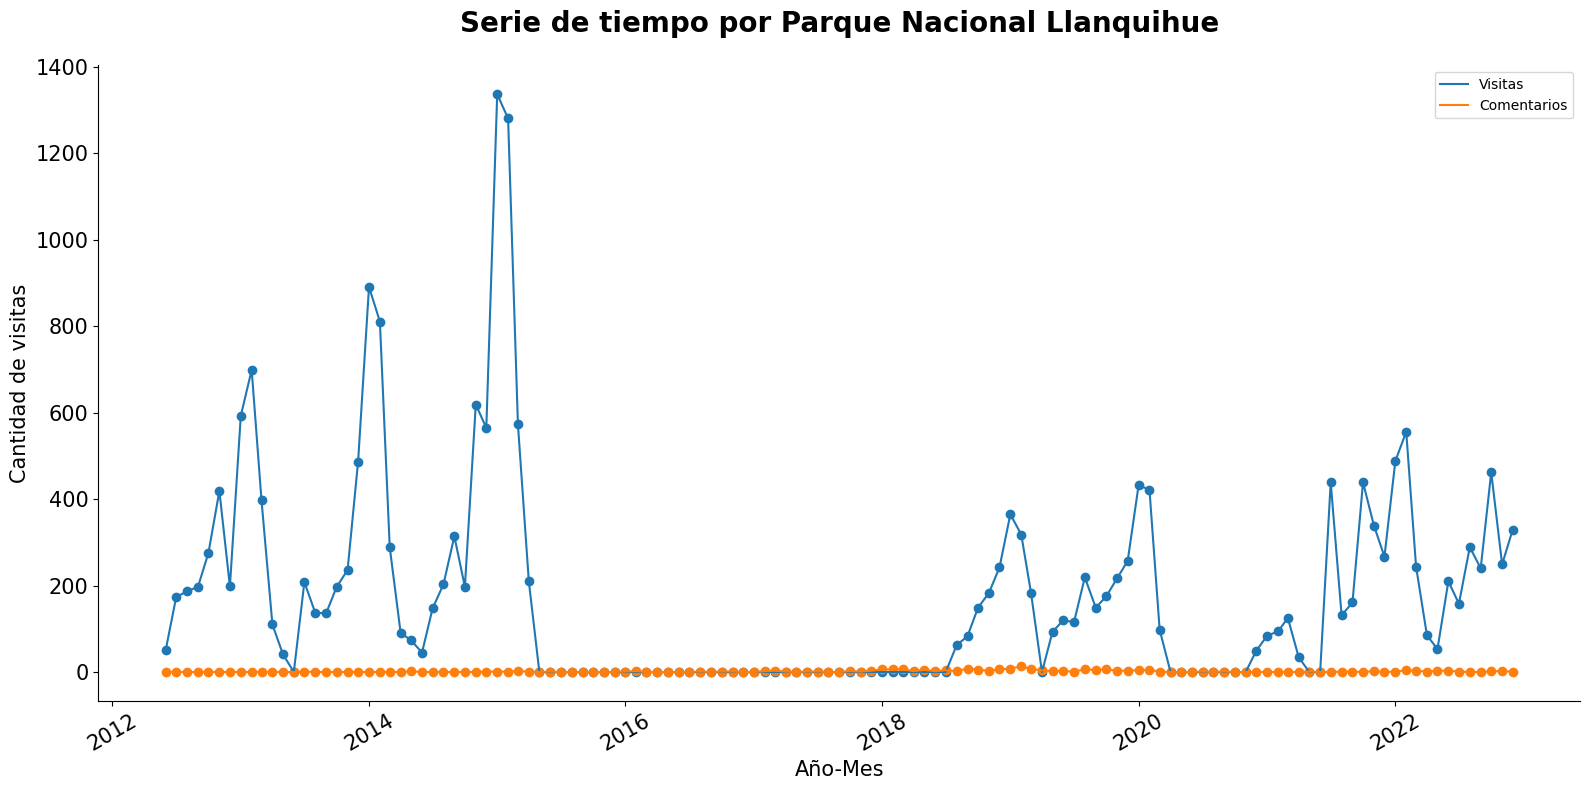

In [15]:
columna = 'Llanquihue'
graficar_pearson(columna,parques,comentarios_completo)

## Parque Nacional Pumalin Douglas Tompkins

Correlación de Pearson entre las columnas:
-0.09222469941366844


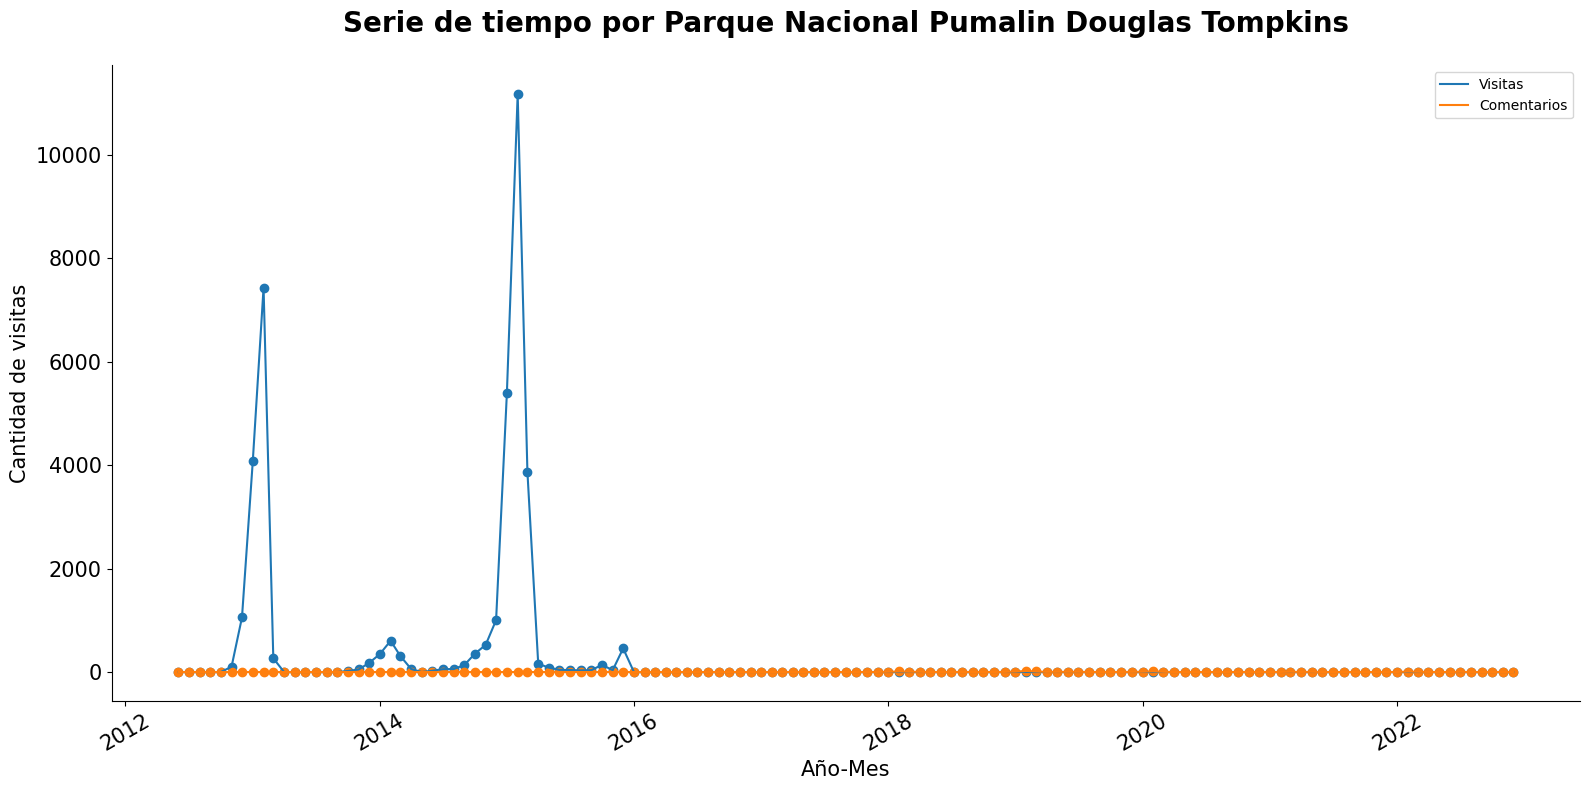

In [16]:
columna = 'Pumalin Douglas Tompkins'
graficar_pearson(columna,parques,comentarios_completo)

## Parque Nacional Puyehue

Correlación de Pearson entre las columnas:
-0.016464840107132065


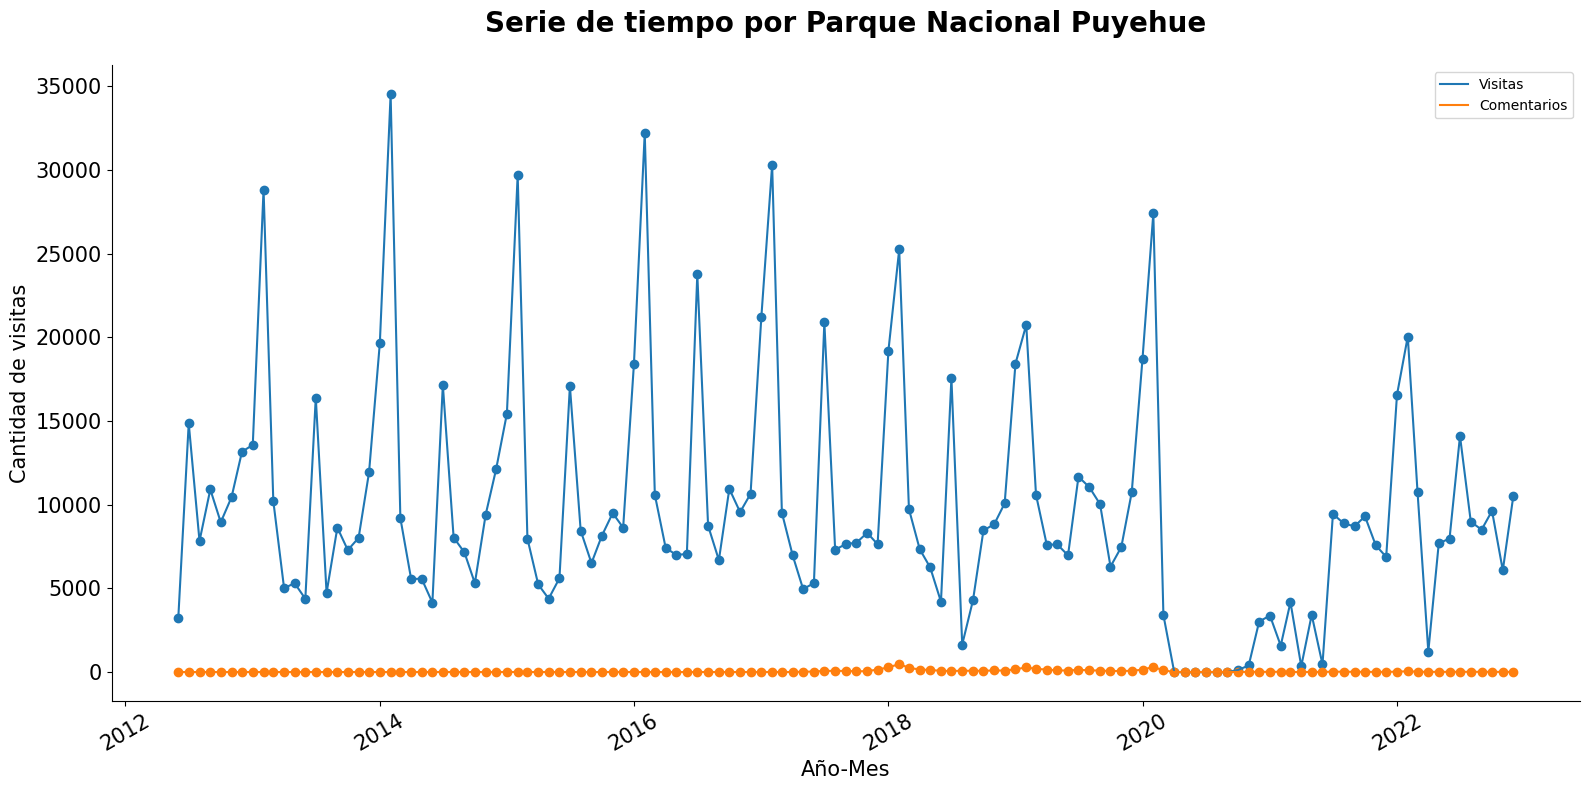

In [17]:
columna = 'Puyehue'
graficar_pearson(columna,parques,comentarios_completo)

## Parque Nacional Vicente Perez Rosales

Correlación de Pearson entre las columnas:
0.030096943022895974


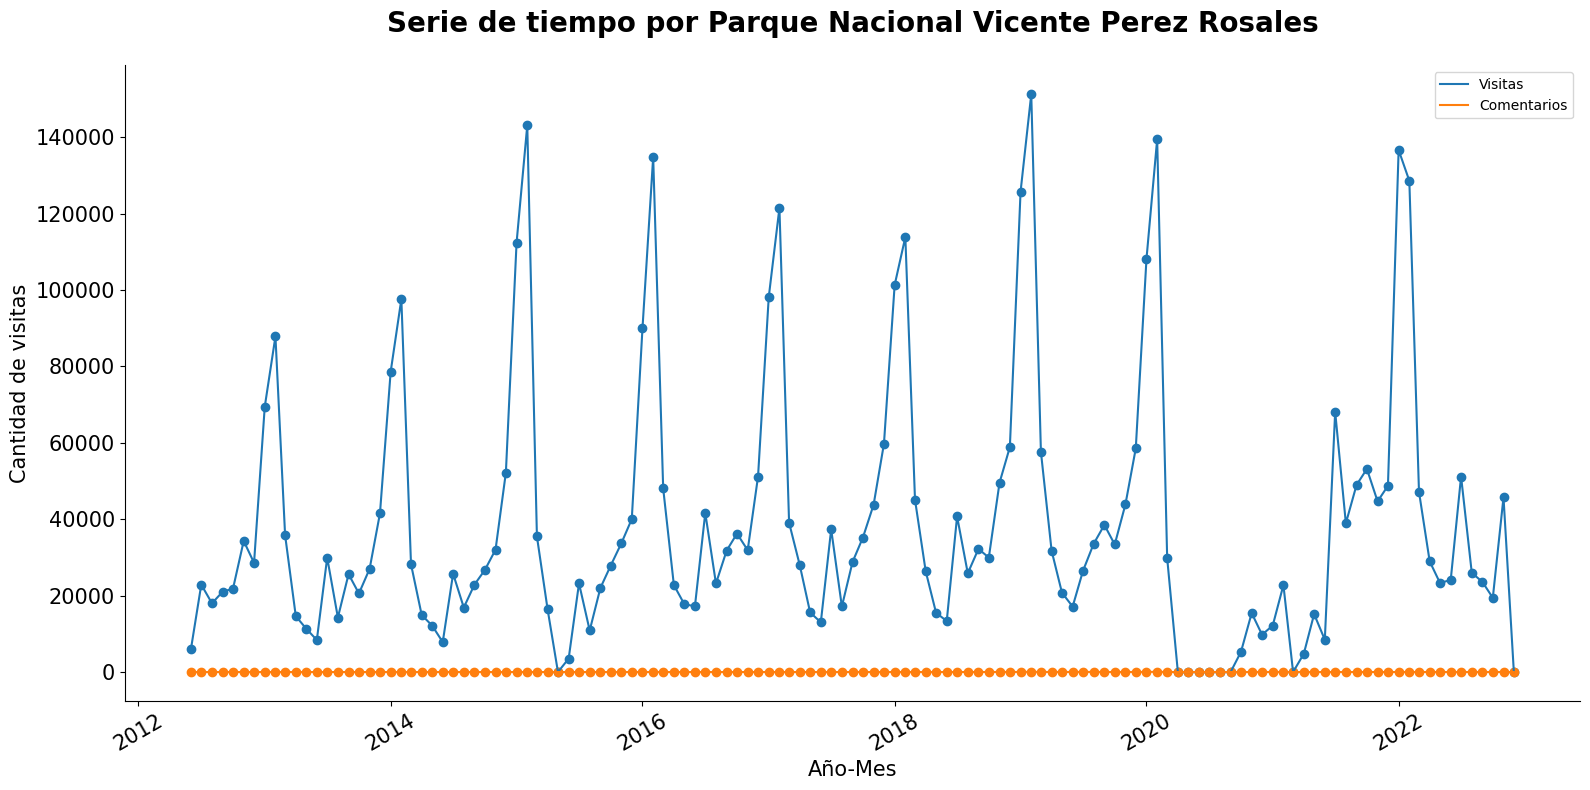

In [18]:
columna = 'Vicente Perez Rosales'
graficar_pearson(columna,parques,comentarios_completo)

## Suma visitas todos los parques vs todos los comentarios de los parques

Correlación de Pearson entre las columnas:
-0.00032184200510072667


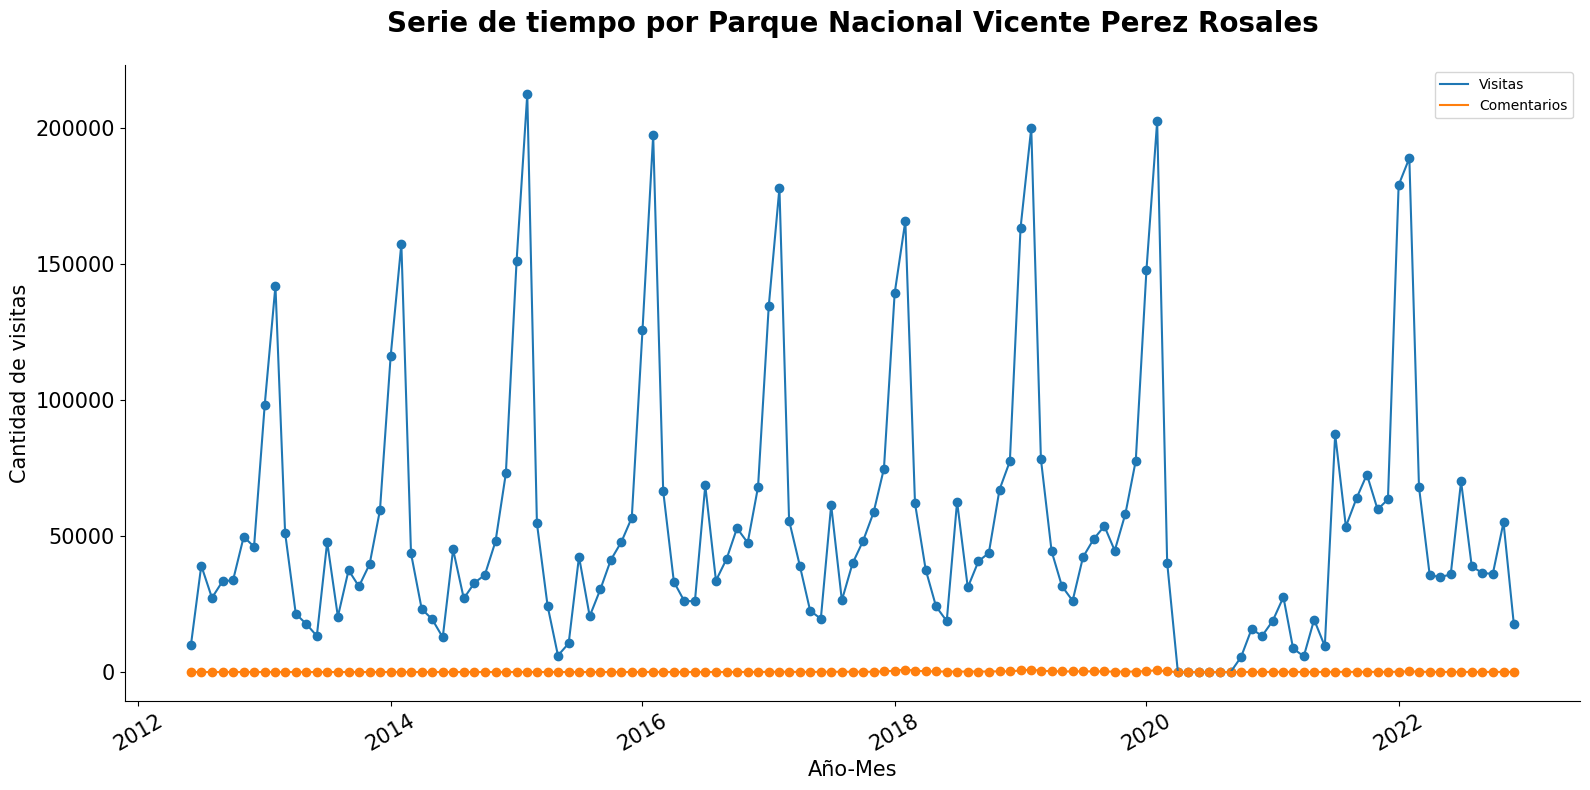

In [19]:
#Se elimiminaran Lago Palena y 
parques = parques.drop(columns=['Año','Mes','Lago Palena','Río Cruces'])
comentarios_completo = comentarios_completo.drop(columns=['Lago Palena'])

serie_1 = parques.sum(axis=1)
serie_2 = comentarios_completo.sum(axis=1)


# Crear un gráfico de puntos y líneas para cada casino
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
plt.plot(parques['Año-Mes'],serie_1, label='Visitas')
plt.scatter(parques['Año-Mes'],serie_1)
plt.plot(parques['Año-Mes'],serie_2, label='Comentarios')
plt.scatter(parques['Año-Mes'],serie_2)
ax.set_xlabel("Año-Mes", fontsize=15)
ax.set_ylabel("Cantidad de visitas", fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=30, fontsize=15)
plt.yticks(fontsize=15)
ax.set_title("Serie de tiempo por Parque Nacional " + columna, pad=24, fontweight=700, fontsize=20)
hide_border(ax)
ax.legend()  # Show the legend with category labels
fig.tight_layout()

correlacion_pearson = serie_1.corr(serie_2)
# Imprimir la correlación de Pearson
print("Correlación de Pearson entre las columnas:")
print(correlacion_pearson)

## Suma visitas todos los parques vs todos los comentarios por año-mes

Correlación de Pearson entre las columnas:
0.13026550927634936


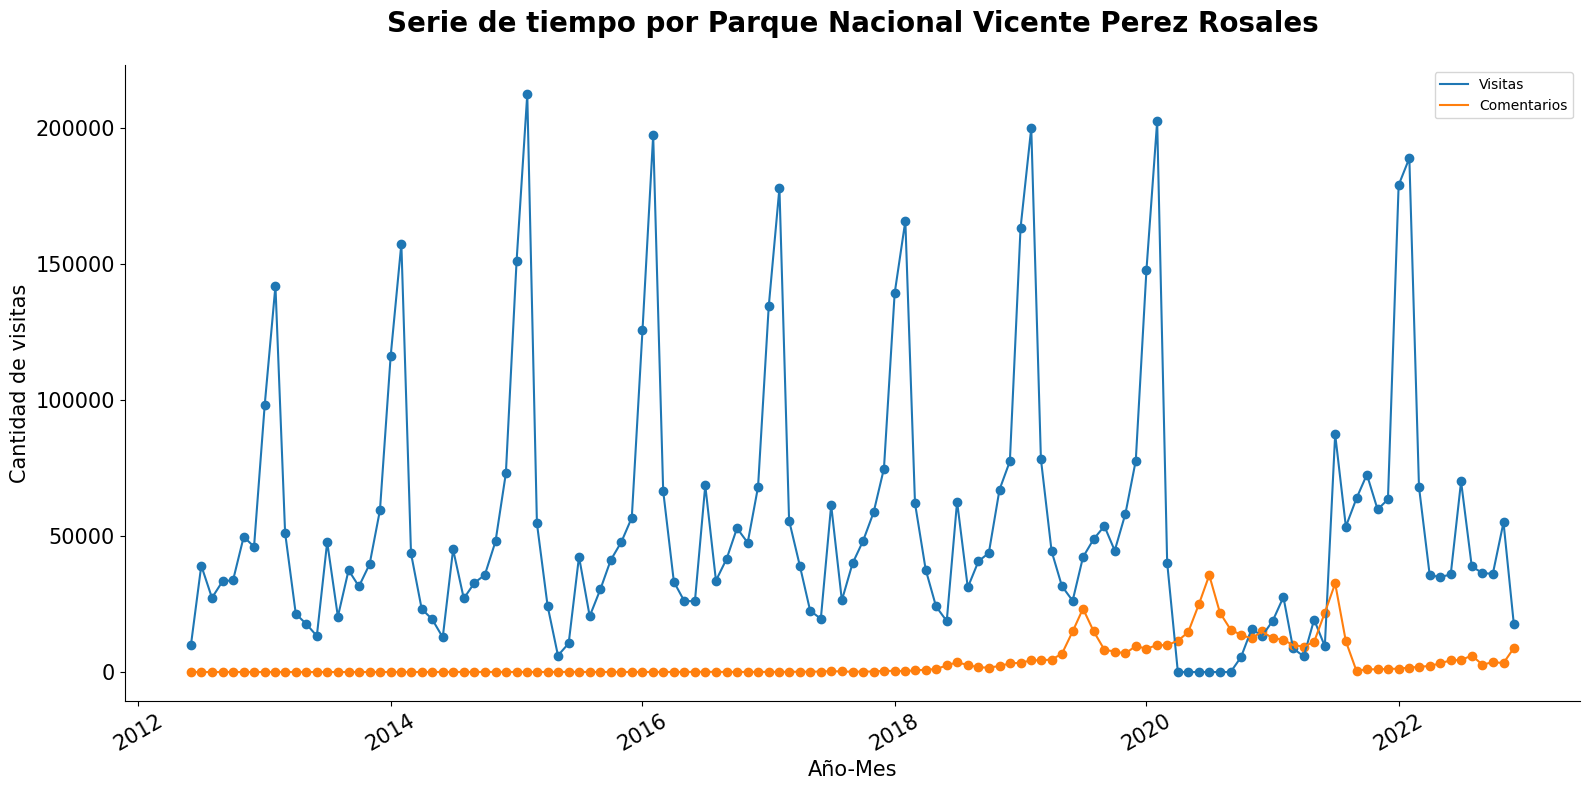

In [20]:
filtered_data_all = datos[['placeId','AñoMes','reviewId']]
# Utilizamos pivot_table para contar los comentarios por 'PlaceId' y 'AñoMes'
comentarios_por_placeid_y_anomes_all = filtered_data_all.pivot_table(index='AñoMes', columns='placeId', values='reviewId', aggfunc='count', fill_value=0).rename(columns={v: k for k, v in places_dict.items()}).reset_index()

# Convertir 'AñoMes' a tipo datetime
comentarios_por_placeid_y_anomes_all['AñoMes']= comentarios_por_placeid_y_anomes_all['AñoMes'].dt.to_timestamp().dt.strftime('%Y-%m')
comentarios_por_placeid_y_anomes_all['AñoMes'] = pd.to_datetime(comentarios_por_placeid_y_anomes['AñoMes'])
comentarios_completo_all = pd.merge(fechas,comentarios_por_placeid_y_anomes_all, on='AñoMes', how='left').fillna(0)


serie_1 = parques.sum(axis=1)
serie_2 = comentarios_completo_all.sum(axis=1)


# Crear un gráfico de puntos y líneas para cada casino
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
plt.plot(parques['Año-Mes'],serie_1, label='Visitas')
plt.scatter(parques['Año-Mes'],serie_1)
plt.plot(parques['Año-Mes'],serie_2, label='Comentarios')
plt.scatter(parques['Año-Mes'],serie_2)
ax.set_xlabel("Año-Mes", fontsize=15)
ax.set_ylabel("Cantidad de visitas", fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=30, fontsize=15)
plt.yticks(fontsize=15)
ax.set_title("Serie de tiempo por Parque Nacional " + columna, pad=24, fontweight=700, fontsize=20)
hide_border(ax)
ax.legend()  # Show the legend with category labels
fig.tight_layout()

correlacion_pearson = serie_1.corr(serie_2)
# Imprimir la correlación de Pearson
print("Correlación de Pearson entre las columnas:")
print(correlacion_pearson)

## Suma visitas todos los parques vs todos los comentarios por año

Correlación de Pearson entre las columnas:
-0.2018968342319127


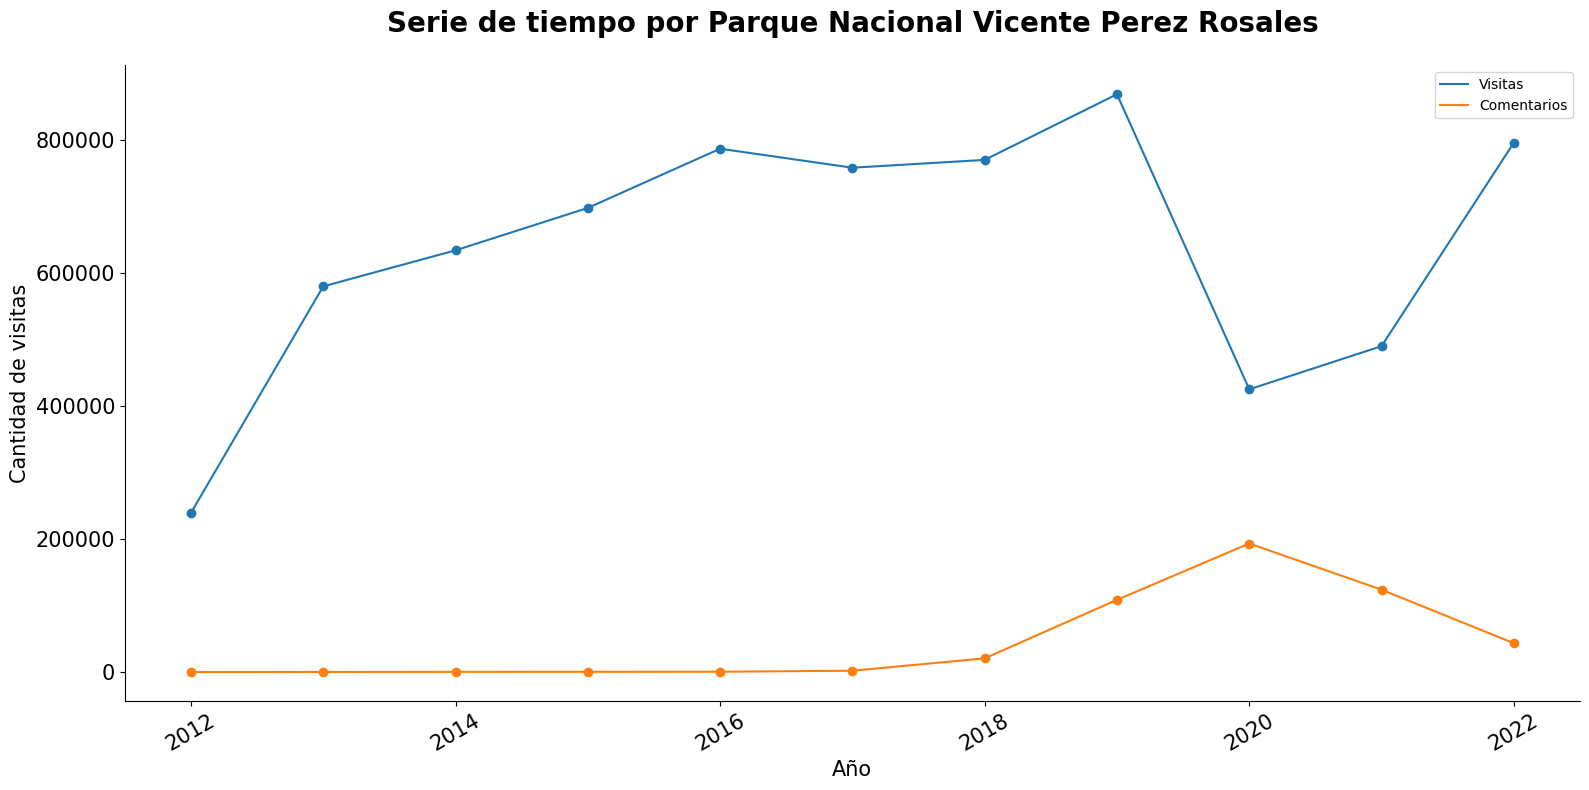

In [21]:
# Convertir la columna 'Año-Me' a tipo datetime
parques['Año'] = pd.to_datetime(parques['Año-Mes']).dt.year
comentarios_completo_all['Año'] = pd.to_datetime(comentarios_completo_all['AñoMes']).dt.year
# Agrupar por año y sumar los valores de cada parque
sum_por_ano_parques = parques.groupby('Año').sum()
sum_por_ano_comentarios_all = comentarios_completo_all.groupby('Año').sum()

serie_1 = sum_por_ano_parques.sum(axis=1)
serie_2 = sum_por_ano_comentarios_all.sum(axis=1)


# Crear un gráfico de puntos y líneas para cada casino
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
plt.plot(sum_por_ano_parques.index,serie_1, label='Visitas')
plt.scatter(sum_por_ano_parques.index,serie_1)
plt.plot(sum_por_ano_parques.index,serie_2, label='Comentarios')
plt.scatter(sum_por_ano_parques.index,serie_2)
ax.set_xlabel("Año", fontsize=15)
ax.set_ylabel("Cantidad de visitas", fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=30, fontsize=15)
plt.yticks(fontsize=15)
ax.set_title("Serie de tiempo por Parque Nacional " + columna, pad=24, fontweight=700, fontsize=20)
hide_border(ax)
ax.legend()  # Show the legend with category labels
fig.tight_layout()

correlacion_pearson = serie_1.corr(serie_2)
# Imprimir la correlación de Pearson
print("Correlación de Pearson entre las columnas:")
print(correlacion_pearson)